# TITANIC

22MCA1072

HARSH YADAV

## 1.Load the Titanic dataset from Kaggle to working environment.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [4]:
data = pd.read_csv('H:/VisualCode/Pyhton/college/ML/train.csv')

In [5]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 2.Perform  exploratory  analysis  on  the  loaded  dataset  and  draw  your inferences.

checking the null data

In [6]:
len(data)

891

In [7]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

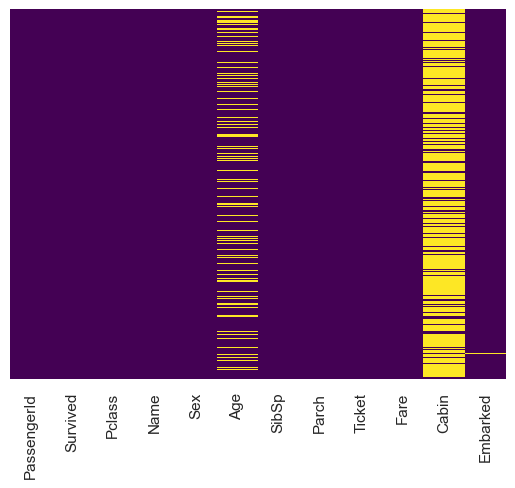

In [8]:
sns.heatmap(data.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

> cabin colums has more than 75% null value which makes it insignificant to use

In [9]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: xlabel='Survived', ylabel='count'>

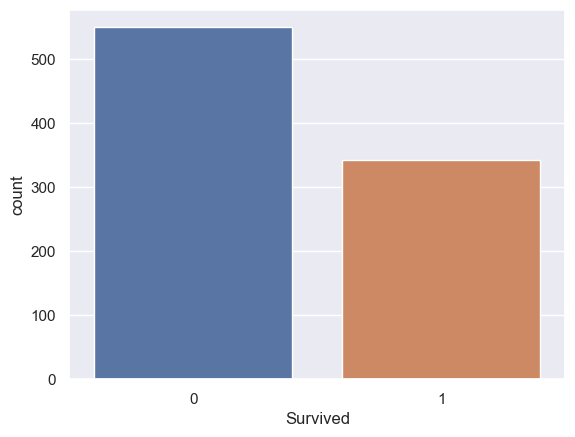

In [10]:
# total dead and survived

sns.countplot(x = 'Survived',
              data = data)

<Axes: xlabel='Survived', ylabel='count'>

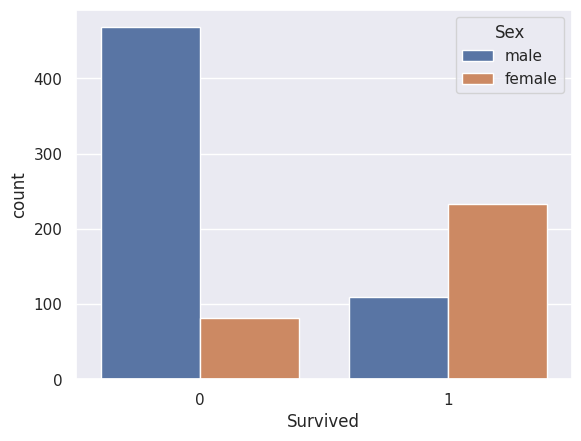

In [238]:
# survived -- gender

sns.countplot(x = 'Survived',
              hue = 'Sex',
              data = data,
              )

<Axes: xlabel='Survived', ylabel='count'>

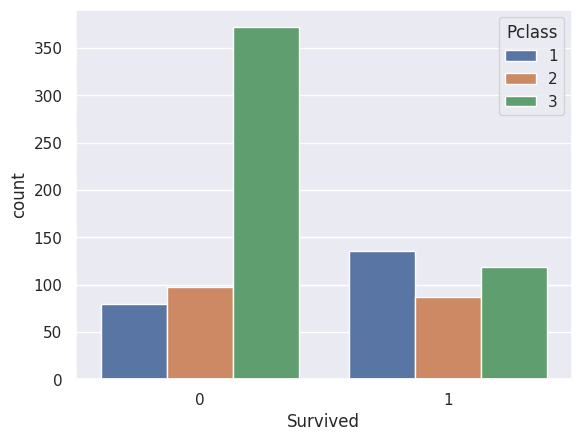

In [239]:
# survived -- gender -- passenger class

sns.countplot(x = 'Survived',
              hue = 'Pclass',
              data = data)

<Axes: >

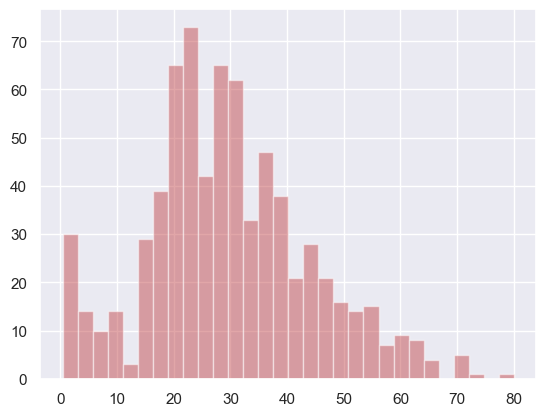

In [6]:
data['Age'].hist(bins = 30, alpha = 0.5, color = 'r')

<Axes: xlabel='SibSp', ylabel='count'>

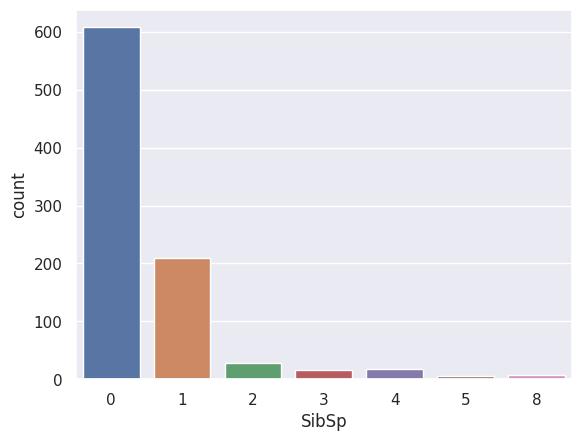

In [241]:
# no. of people together

sns.countplot(x = 'SibSp',
              data = data)

<Figure size 800x400 with 0 Axes>

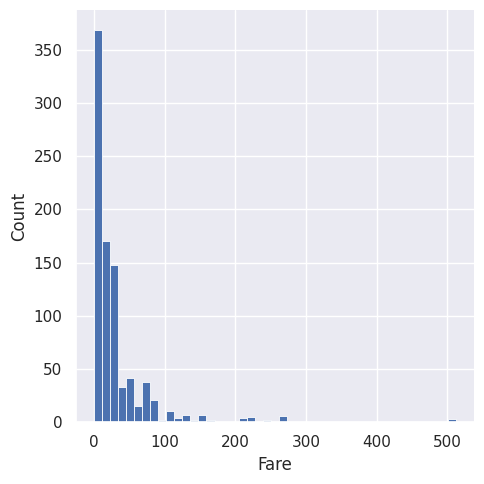

In [242]:
# fare 

plt.figure(figsize = (8, 4))
sns.displot(data['Fare'],
            alpha = 1,
            bins = 45)

In [304]:
num_var = [x for x in data.columns if dtype(data[x]) !='O']

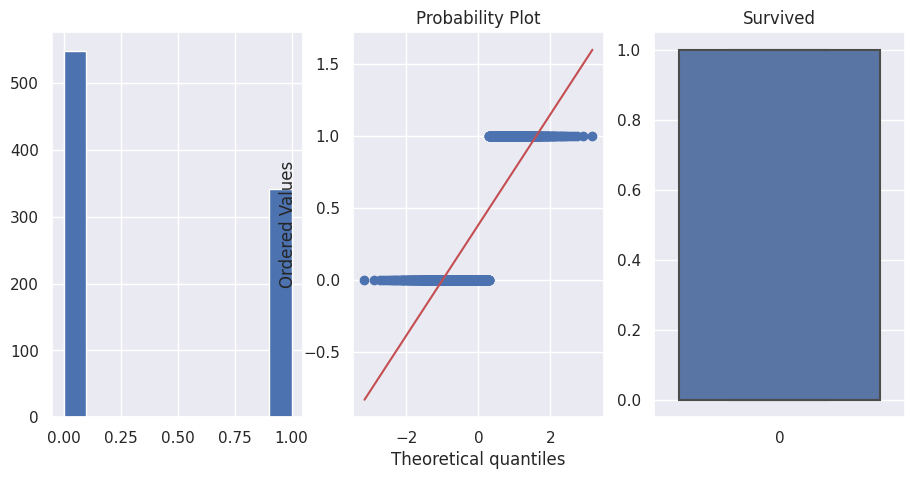

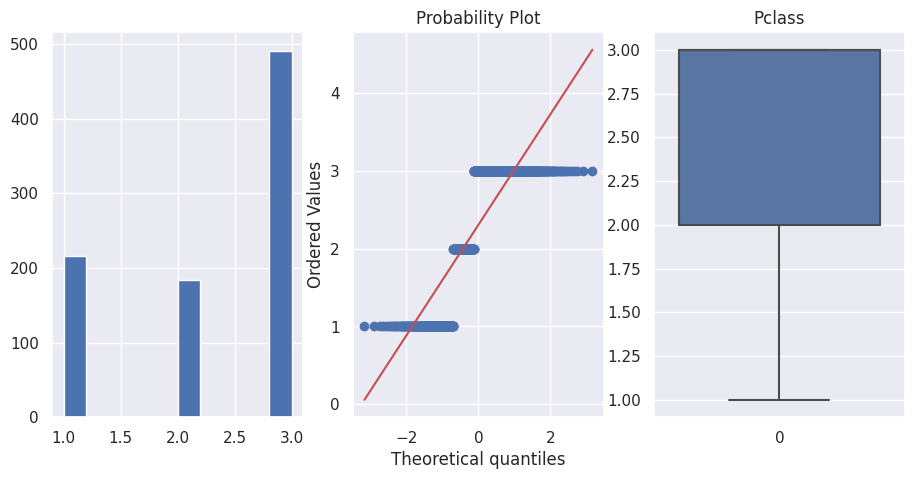

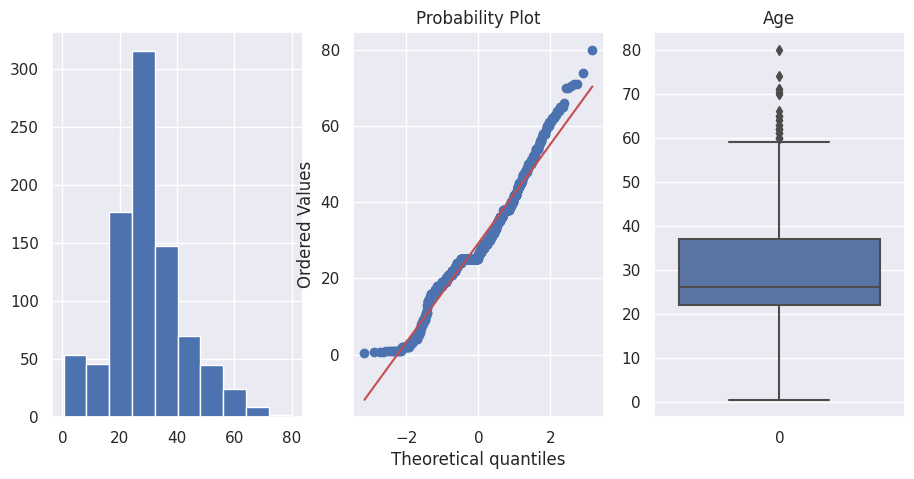

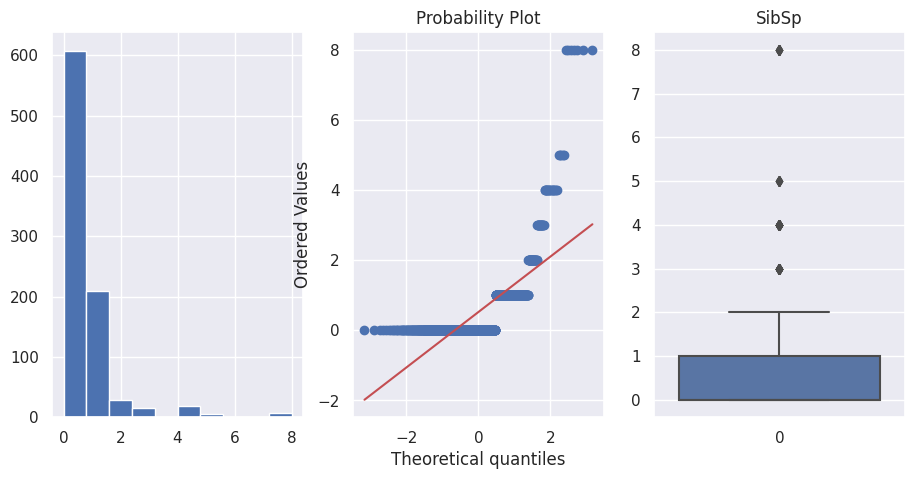

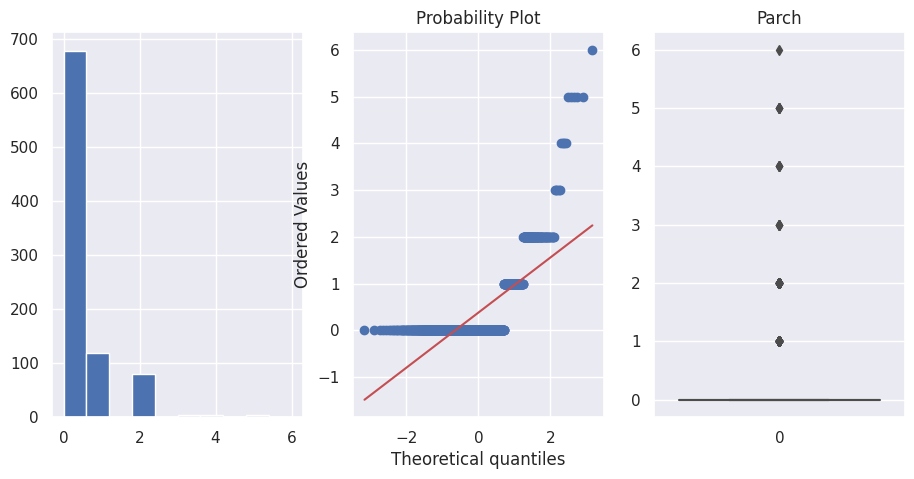

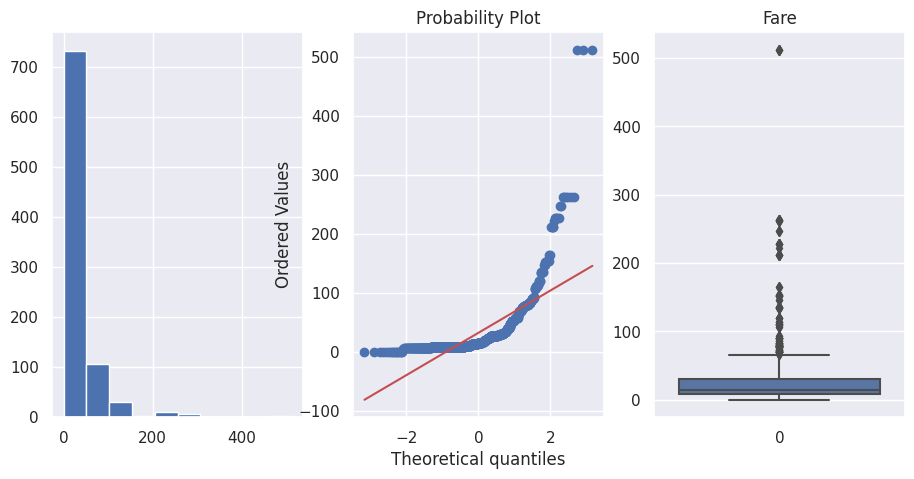

In [309]:
# qq-plot

import scipy.stats as stats

def getplots(df, col):

    plt.figure(figsize=(11,5))
    plt.subplot(1,3,1)
    plt.hist(df[col])
    
    plt.subplot(1,3,2)
    stats.probplot(df[col],dist='norm',plot=plt)
    
    plt.subplot(1,3,3)
    sns.boxplot(df[col])

    plt.title(col)
    
    plt.show()

for i in num_var:
  getplots(data, i)

- from the above observations, we can say that Fare is continuous Random variable but not normally distributed, age is somewhat follows normal distribution.


- to convert fare, we could have used log form but for now we leave it as it is


- Rest are discrete random variables.

## 3.From the above analysis if any attributes are not relevant in accessing the survival pattern of the passenger then drop those columns.

In [243]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


from the above observations, we can conclude that PassengerId, Name, Ticket and  is irrelevant

Cabin has a lot of missing values

- dropping 

In [244]:
data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'],
          axis = 1,
          inplace = True)

data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


## 4.Check for the missing values in the modified dataset and fill the missing values with appropriate methods. 

In [245]:
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

### Age

age has 177 missing values

In [246]:
data['Age'].mean()

29.69911764705882

In [247]:
data['Age'].median()

28.0

> We can use any of the above method to fill the values of Age column


<Axes: xlabel='Pclass', ylabel='Age'>

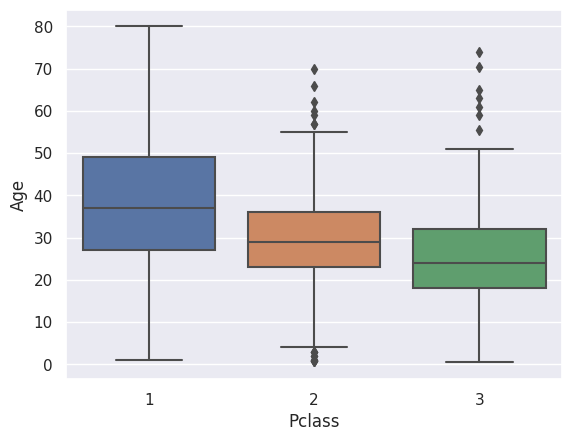

In [248]:
sns.boxplot(x = data['Pclass'], y = data['Age'])

people in class 1 are more older than those in other classes

In [249]:
pclass_1 = data[data['Pclass'] == 1]
pclass_2 = data[data['Pclass'] == 2]
pclass_3 = data[data['Pclass'] == 3]

In [250]:
print(pclass_1['Age'].mean(),
pclass_2['Age'].mean(),
pclass_3['Age'].mean())

38.233440860215055 29.87763005780347 25.14061971830986


In [251]:
def impute_age(cols):
  age = cols[0]
  pclass = cols[1]

  if pd.isnull(age):

    if pclass == 1:
      return 38

    elif pclass == 2:
      return 29

    else:
      return 25
  else:
    return age

In [252]:
data['Age'] = data[['Age', 'Pclass']].apply(impute_age,
                                            axis = 1)

In [253]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [254]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [255]:
data['Embarked'] = data['Embarked'].fillna(data.Embarked.value_counts().index[0])

In [256]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [257]:
data.Embarked.value_counts().index[0]

'S'

<Axes: >

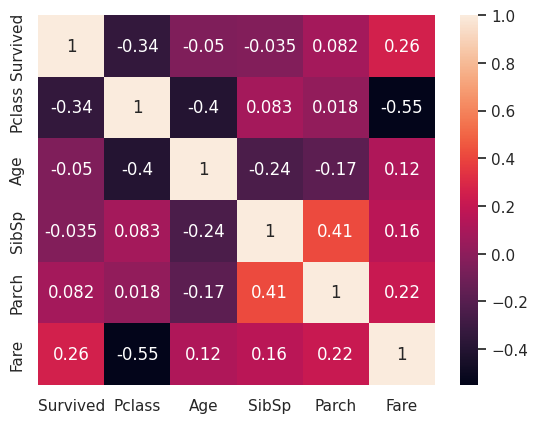

In [307]:
sns.heatmap(data.corr(), 
            annot = True)

## 5.Split the modified dataset into 80-20 ratio for training and testing.

### Converting Categorical variable to Numerical

In [259]:
from numpy.core.multiarray import dtype

In [260]:
# checking categorical variables

for i in data.columns:
  if dtype(data[i]) == 'O':
    print(i)

Sex
Embarked


In [261]:
data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [262]:
data['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

to change categorical variable, we have several techniques available,such as

- Label Encoder
- One Hot Encoding
- pandas get dummies
- target encoding,,,,etc


to reduce the complexity, we will use one hot encoding

In [263]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [277]:
# definin X and y

X = data.iloc[:,1:].values
y = data.iloc[:, 0].values

In [278]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers = [('encoder',
                                        OneHotEncoder(),
                                        [1, -1])], # taking sex and embarked
                       remainder='passthrough')

X = ct.fit_transform(X)

In [279]:
X

array([[0.0, 1.0, 0.0, ..., 1, 0, 7.25],
       [1.0, 0.0, 1.0, ..., 1, 0, 71.2833],
       [1.0, 0.0, 0.0, ..., 0, 0, 7.925],
       ...,
       [1.0, 0.0, 0.0, ..., 1, 2, 23.45],
       [0.0, 1.0, 1.0, ..., 0, 0, 30.0],
       [0.0, 1.0, 0.0, ..., 0, 0, 7.75]], dtype=object)

### Split

In [280]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 42)

## 6.Apply Logistic Regression and design a model on the training data.

### without standardizing

In [281]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression().fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [282]:
y_pred = lr.predict(X_test)

In [283]:
from sklearn.metrics import confusion_matrix,accuracy_score #confusion matrix and accuracy score
cm=confusion_matrix(y_test,y_pred)
ac=accuracy_score(y_test,y_pred)
print(cm,ac)

[[91 14]
 [19 55]] 0.8156424581005587


In [285]:
#checing cross validation score
from sklearn.model_selection import cross_val_score
acrcy=cross_val_score(estimator=lr
                      ,X=X_train
                      ,y=y_train,
                      cv=10)
print('Accuracy',acrcy.mean()*100)
print('Standard Deviation {:.2f}%'.format(acrcy.std()*100))

Accuracy 79.91001564945228
Standard Deviation 7.70%


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

### with standardization

In [288]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test) # only transform to avoid data leakage

In [289]:
# fitting on standardized data

lr_sc = LogisticRegression().fit(X_train_sc, y_train)

In [310]:
y_pred = lr_sc.predict(X_test_sc)

In [311]:
from sklearn.metrics import confusion_matrix,accuracy_score #confusion matrix and accuracy score
cm=confusion_matrix(y_test,y_pred)
ac=accuracy_score(y_test,y_pred)
print(cm,ac)

[[92 13]
 [19 55]] 0.8212290502793296


<Axes: >

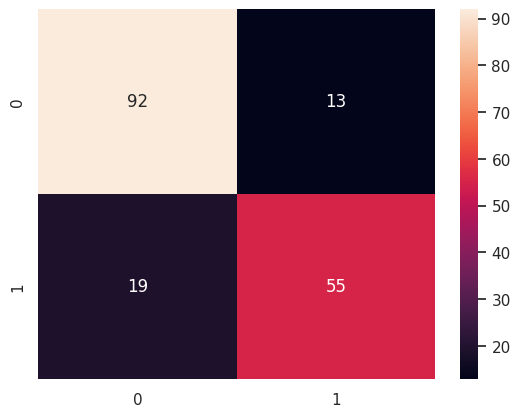

In [313]:
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot = True)

In [293]:
#checing cross validation score
from sklearn.model_selection import cross_val_score
acrcy=cross_val_score(estimator=lr_sc,
                      X=X_train_sc,
                      y=y_train,
                      cv=10)
print('Accuracy',acrcy.mean()*100)
print('Standard Deviation {:.2f}%'.format(acrcy.std()*100))

Accuracy 79.91001564945228
Standard Deviation 8.00%


> the current model is not well performing, to tweak or improve the model, we'll have to tune the hyperparameters

> Or we can use Label encoding in place of One Hot, because label encoding reduces the dimensions thus reducing the complexity...

## 7.Fit the created model on the test data.

In [296]:
lr_test = LogisticRegression().fit(X_test_sc, y_test)

In [297]:
ypred = lr_test.predict(X_train)

In [299]:
from sklearn.metrics import confusion_matrix,accuracy_score #confusion matrix and accuracy score
cm=confusion_matrix(y_train, ypred)
ac=accuracy_score(y_train, ypred)
print(cm,ac)

[[441   3]
 [258  10]] 0.6334269662921348
